# SyriaTel Telecom Customer Churn Prediction 
## 1. Business Understanding
###  Business Problem
In the highly competitive telecommunications industry, customer retention is one of the most important drivers of profitability. Acquiring new customers is often more expensive than retaining existing ones, and high churn (customer dropout) can significantly impact revenue and long-term growth.
SyrialTel, a telecommunications provider is losing revenue due to customer churn. Customer churn is the act of customers ceasing their subscriptions or leaving the service. Reducing churn is crucial for maintaining a stable customer base and profitability.
The current system lacks a predictive mechanism to identify customers at risk of churning, meaning the business is reactive rather than proactive in handling customer dissatisfaction. This limits the ability of the Customer Retention and Marketing teams to design timely and targeted interventions (e.g., special offers, upgrades, or customer service outreach).

### Business Objective
The goal is to develop a **machine learning classification model** that predicts whether a customer will churn using available customer data.

To solve this problem, I will:
    - Use Logistic regression as a baseline model
    - Build a decision tree classifier as an improved, non linear model with tuned hyperparameters.
    - Focus on maximising recall for churners, ensuring customer data.
    - Present actionable insights

### Stakeholder
SyrialTel's Marketing and Customer Retention team who will use the model's predictions to design targeted campaigns to reduce churn.

## 2. Data Understanding
The dataset being used for this project was obtained from kaggle. The dataset is reviewed to access the structure and characteristics of the data.

In [16]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import tree

In [17]:
df = pd.read_csv('customer-churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [18]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [20]:
# statistical summary
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Data Preparation
Before analysis and modeling, it is essential to clean the dataset to ensure accuracy and reliability. In this step, I handle missing values, remove irrelevant features and convert categorical variables and numerical formats. This prepares the data for effective exploration and model building.

In [21]:
# drop irrelevant columns
df.drop(columns=['phone number', 'state', 'area code'], axis =1, inplace=True )

In [22]:
# checking for duplicates
df.duplicated().sum()

0

In [23]:
# Check for missing values
df.isna().sum()

account length            0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [24]:
# Convert boolean to integer
df['churn'] = df['churn'].astype(int)

In [25]:
# encoding the categorical features
categorical = ['international plan', 'voice mail plan', 'churn']

encoder = OneHotEncoder(drop='first', sparse=False)

# fit and transform the categorical columns
encoded_array = encoder.fit_transform(df[categorical])

# encoded feature names
encoded_cols = encoder.get_feature_names(categorical)


In [26]:
# convert to dataframe
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

# Drop original categorical columns and concatenate the encoded DataFrame
df_encoded = pd.concat([df.drop(columns=categorical), encoded_df], axis=1)

In [27]:
df_encoded

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_yes,voice mail plan_yes,churn_1
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0.0,1.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0.0,1.0,0.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0.0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1.0,0.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0.0,1.0,0.0
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0.0,0.0,0.0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0.0,0.0,0.0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,1.0,0.0,0.0


## Exploratory Data Analysis(EDA)
In this section , we explore the dataset to better understand the distribution, relationships and patterns among the variables that may influence customer churn. We begin by examining the distribution of numerical and categorical features, identifying correlations with the target variable (`churn`), and checking for any class imbalances or anomalies. This analysis provided crucial insights that wiill guide the choice of features and preprocessing steps for modeling.

1. Class Distribution

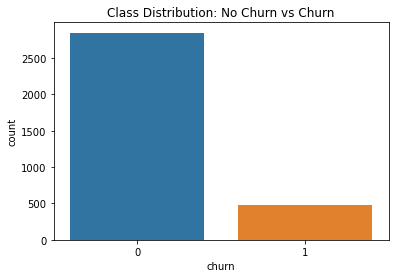

In [29]:
# checking for class imbalance
df_encoded['churn_1'].value_counts(normalize=True)

import seaborn as sns
sns.countplot(x='churn', data=df)
plt.title('Class Distribution: No Churn vs Churn')
plt.show()

Insights from the chart:
- The bar for `0`(No churn) is significantly taller than that for `1`(Churn), indicating that most customers stayed with the service.
- There is class imbalance which will be handled before modelling

2. Categorical Feature Analysis

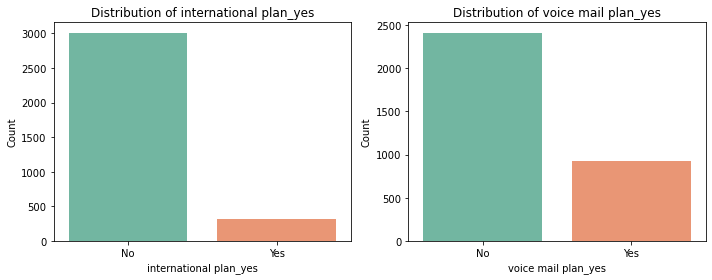

In [31]:
# List the one-hot encoded categorical columns
encoded_cat_features = ['international plan_yes', 'voice mail plan_yes']

# Create subplots
fig, axes = plt.subplots(1, len(encoded_cat_features), figsize=(10, 4))

# If there's only one subplot, convert axes to a list
if len(encoded_cat_features) == 1:
    axes = [axes]

# Loop through each feature and plot
for i, col in enumerate(encoded_cat_features):
    sns.countplot(data=df_encoded, x=col, palette='Set2', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()


Insights from the chart above:

**International plan**
- A majority of customers do not have an international plan

**Voice mail plan**
- Most customers still do not have the plan, but the gap is smaller compared to the international plan
- Both plans are less popular than not having them, but the voice mail plan has a higher adoption rate.

3.Numerical features

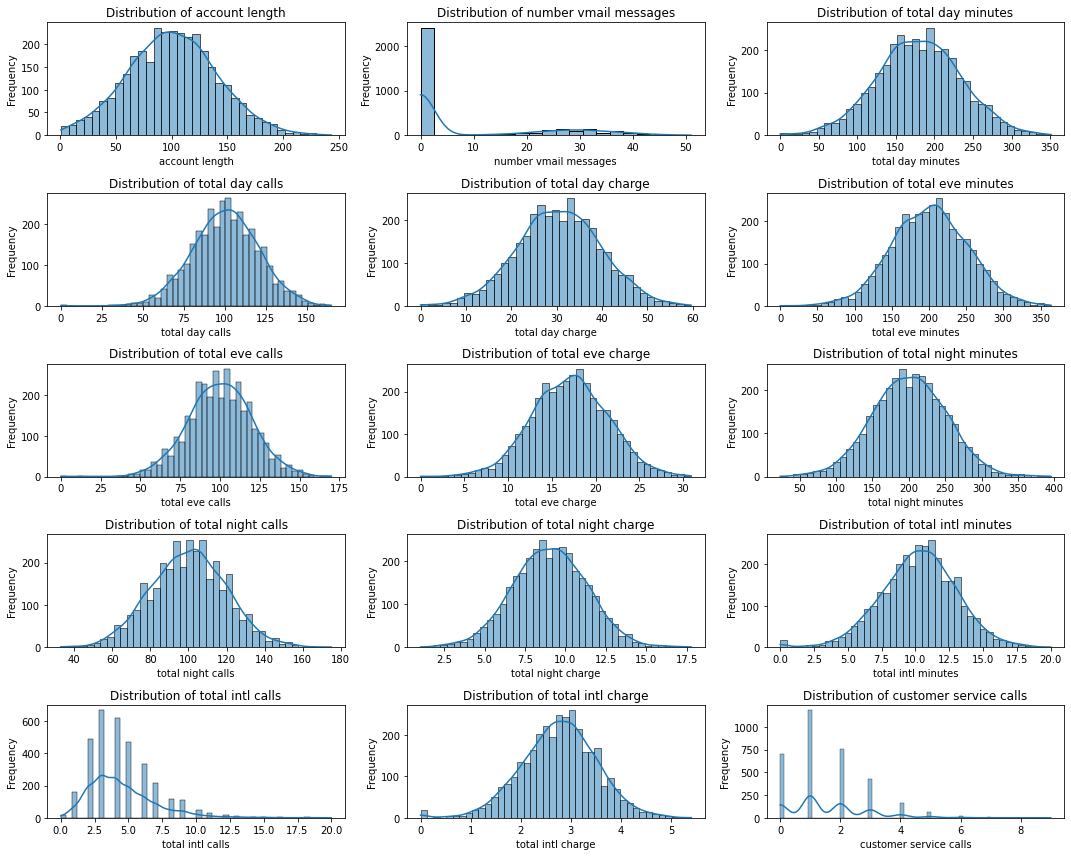

In [32]:
# Drop the categorical features using correct column names
numerical = df_encoded.drop(columns=['international plan_yes', 'voice mail plan_yes', 'churn_1'], axis=1)

# Create subplots
fig, axes = plt.subplots(5, 3, figsize=(15, 12))
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical.columns):
    sns.histplot(data=df_encoded, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Insights from the above:
- `Account length`, `total day minutes/calls/charge`, `total eve minutes/calls/charge`, `total night minutes/calls/charge` and `total intl minutes/charge` have a **roughly normal distribution**, indicating balanced usage.
- `Number Vmail messages`, `customer service calls` and `total intl calls` are **right skewed** showing most users have few or zero voicemail messages, few calls and few international calls respectively.
- Total charges (day, evening, night, international) mirror the distributions of their respective minute features, which is expected since charges are typically proportional to usage.
- The spike in customer service calls around 1–3 might indicate a common pain point or need for support in those instances.

4. Correlation Distribution

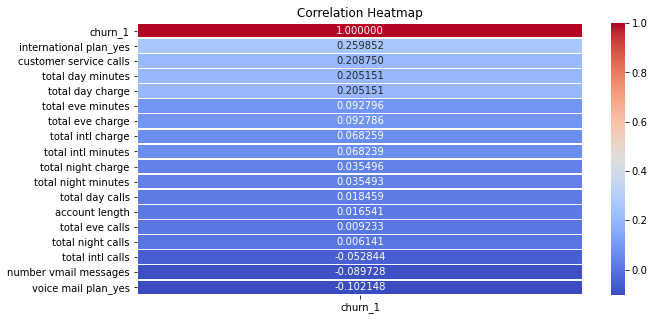

In [33]:
correlation_matrix = df_encoded.corr()['churn_1'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='2f', linewidth=0.5)
plt.title('Correlation Heatmap')
plt.show()

Insights from above:
- `International plan`, `customer service calls`, `total day minutes`, `total day charge` are **positively correlated** with churn, indicating they are more likely associated with customers who churn.
- `Voice mail plan`, `number of vmail messages`, `total intl calls` are **negatively correlated** with churn and are more common among customers who did not churn.
- Variables like `account length`, `total night calls`, or `total evening calls` show very weak or no correlation with churn, suggesting they don’t significantly impact churn prediction directly.